## Using the Quantum Audio Module
### For building  and manipulating quantum audio representations

The *quantumaudio* module implements a QuantumAudio class that is able to handle the encoding/decoding process of some quantum audio representations, such as building a quantum circuit for preparing and measuring the quantum audio state, simulating the circuit in Qiskit Aer's *qasm_simulator*, running the circuit in real hardware using *IBMQ* (as long as you have an account, provider and backend), necessary pre and post processing according to each encoding scheme, plotting and listening to the retrieved sound.

The available encoding schemes are:

+ QPAM - Quantum Probability Amplitude Modulation (Simple quantum superposition)
+ SQ-PAM - Single-Qubit Probability Amplitude Modulation (similar to FRQI image representations)
+ QSM - Quantum State Modulation (also known as FRQA)

First of all, make sure you have all of the following dependencies installed:

- numpy
- matplotlib
- IPython.display
- bitstring
- qiskit

If you are on a Linux system, you might be able to install the dependencies by uncommenting and running this line:

In [1]:
# !pip3 install numpy matplotlib ipython bitstring qiskit

The *quantumaudio* module imports all of the required qiskit functions that are used internally. 

In [1]:
import numpy as np
import quantumaudio as qa
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute

Then, we create/load some digital audio. QPAM and SQ-PAM are representations that can handle arrays with floating point or decimal numbers from -1 to 1, similar to a PCM .wav or .flac file

For this input, the QPAM representation will require:
         3 qubits for encoding time information and 
         0 qubits for encoding ampĺitude information.
For this input, the SQ_PAM representation will require:
         3 qubits for encoding time information and 
         1 qubits for encoding ampĺitude information.


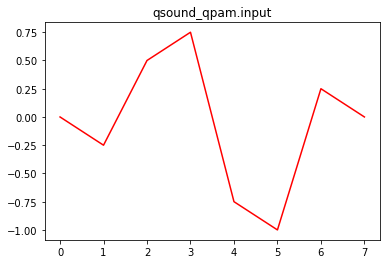

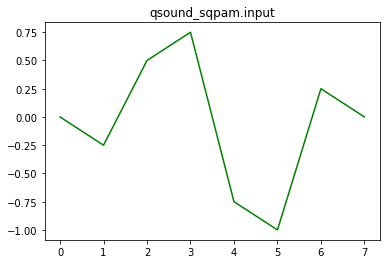

In [3]:
digital_audio = np.array([0., -0.25, 0.5 , 0.75,  -0.75  ,  -1.,  0.25 ,  0.])

qsound_qpam = qa.QuantumAudio('qpam')
qsound_qpam.load_input(digital_audio)

qsound_sqpam = qa.QuantumAudio('sq-pam')
qsound_sqpam.load_input(digital_audio)

plt.plot(qsound_qpam.input, 'r')
plt.title('qsound_qpam.input')
plt.show()
plt.plot(qsound_sqpam.input, 'g')
plt.title('qsound_sqpam.input')
plt.show()

But the same *digital_audio* will not work with QSM. The QSM works with integer values only, so it will round the numbers by default, removing all of the decimals and destroying the input:

For this input, the QSM representation will require:
         3 qubits for encoding time information and 
         1 qubits for encoding ampĺitude information.


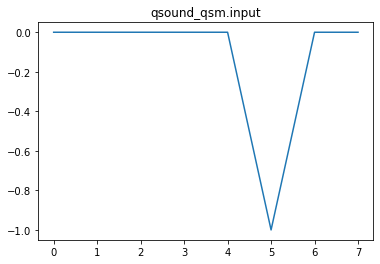

In [4]:
qsound_qsm = qa.QuantumAudio('qsm')
qsound_qsm.load_input(digital_audio)

plt.plot(qsound_qsm.input)
plt.title('qsound_qsm.input')
plt.show()

To load an input to a QSM audio we need to quantize (or re-quantize) the amplitudes of our signal. In this example, we have conveniently built a *digital_audio* simulating a PCM audio with 3-bit depth quantization. So we only need to multiply our signal by $2^{bitDepth -1}$ and retrieve the quantized version of the signal:

In [5]:
bit_depth=3
quantized_ditial_audio = digital_audio*(2**(bit_depth-1))

print(quantized_ditial_audio)

[ 0. -1.  2.  3. -3. -4.  1.  0.]


Now we can load the quantized version to QSM, by specifying the bit depth as an additional argument. Remeber that the bit deph will also dictate the amount of qubits necessary to store the amplitude imformation.

For this input, the QSM representation will require:
         3 qubits for encoding time information and 
         3 qubits for encoding ampĺitude information.


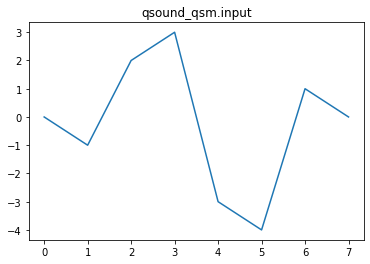

In [6]:
qsound_qsm = qa.QuantumAudio('qsm')
qsound_qsm.load_input(quantized_ditial_audio, 3)

plt.plot(qsound_qsm.input)
plt.title('qsound_qsm.input')
plt.show()

Note: for usability reasons, QPAM and SQ-PAM can also handle quantized signals. The following code does exactly the same thing as before:

For this input, the QPAM representation will require:
         3 qubits for encoding time information and 
         0 qubits for encoding ampĺitude information.
For this input, the SQ_PAM representation will require:
         3 qubits for encoding time information and 
         1 qubits for encoding ampĺitude information.


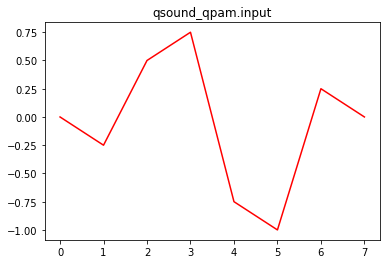

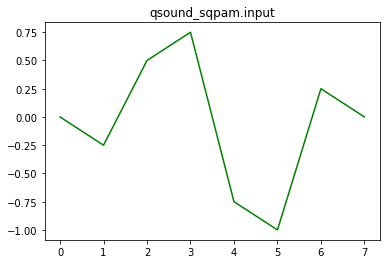

In [7]:
# qsound__qpam = qa.QuantumAudio('qpam')
qsound_qpam.load_input(quantized_ditial_audio, 3)

# qsound_sqpam = qa.QuantumAudio('sq-pam')
qsound_sqpam.load_input(quantized_ditial_audio, 3)

plt.plot(qsound_qpam.input, 'r')
plt.title('qsound_qpam.input')
plt.show()
plt.plot(qsound_sqpam.input, 'g')
plt.title('qsound_sqpam.input')
plt.show()

This means that when working with quantized signals, we can easily switch between quantum audio representations - at least for encoding purposes (any additional quantum algorithm will have dramatically different impacts on each representation).

Now, let's generate quantum circuits with 3 steps: 

1. Converting/preprocessing the signal for a specified encoding scheme (for example, qpam converts the signal into probability amplitudes, sq-pam creates an array of angles) - This is done internally by the QuantumAudio class
2. Generating a Preparation circuit for the input, which encodes the classical information into the quantum system acording to the representation - this is done with the prepare() method
- (any custom quantum circuit could be applied here, by acessing the circuit attribute: qsound.circuit)
3. Inserting measurement instructions at the end of the circuit - measure() method

For now, we are only trying to prepare the quantum audio state and then measure it back.

QPAM Convert
QPAM Prepare
QPAM Measure


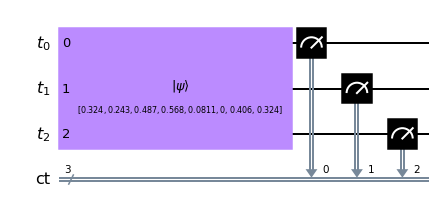

In [8]:
qsound_qpam.prepare()
qsound_qpam.measure()
qsound_qpam.circuit.draw('mpl')

If you are a one-liner, fell free to write everything in a single line:

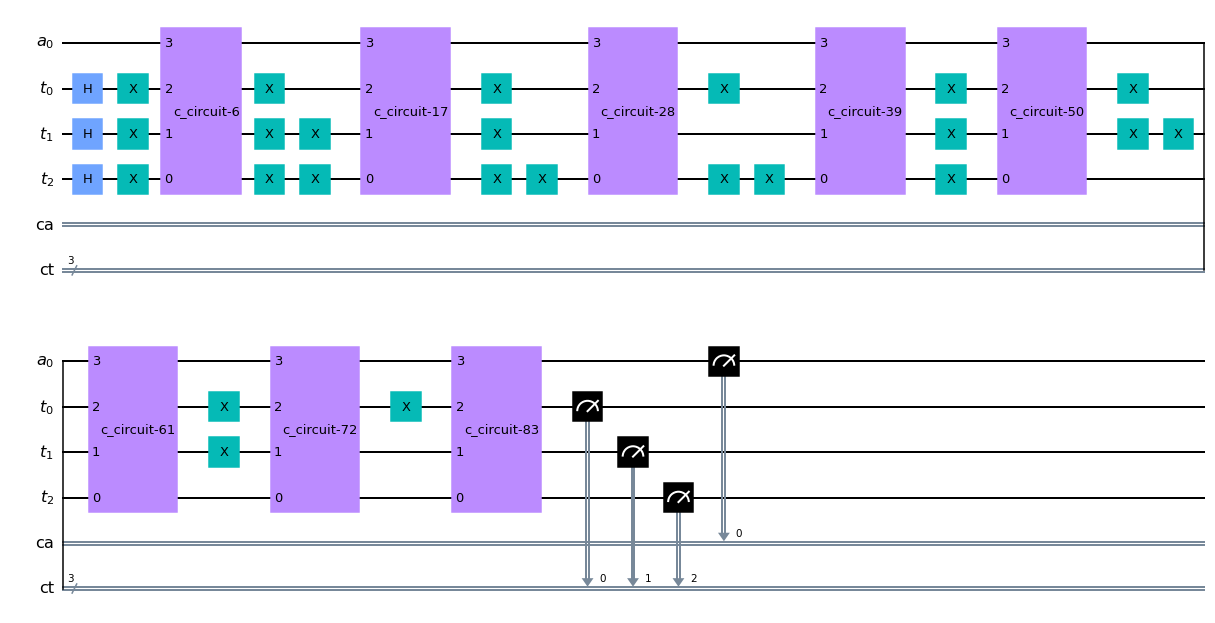

In [9]:
qsound_sqpam.prepare().measure().circuit.draw('mpl')

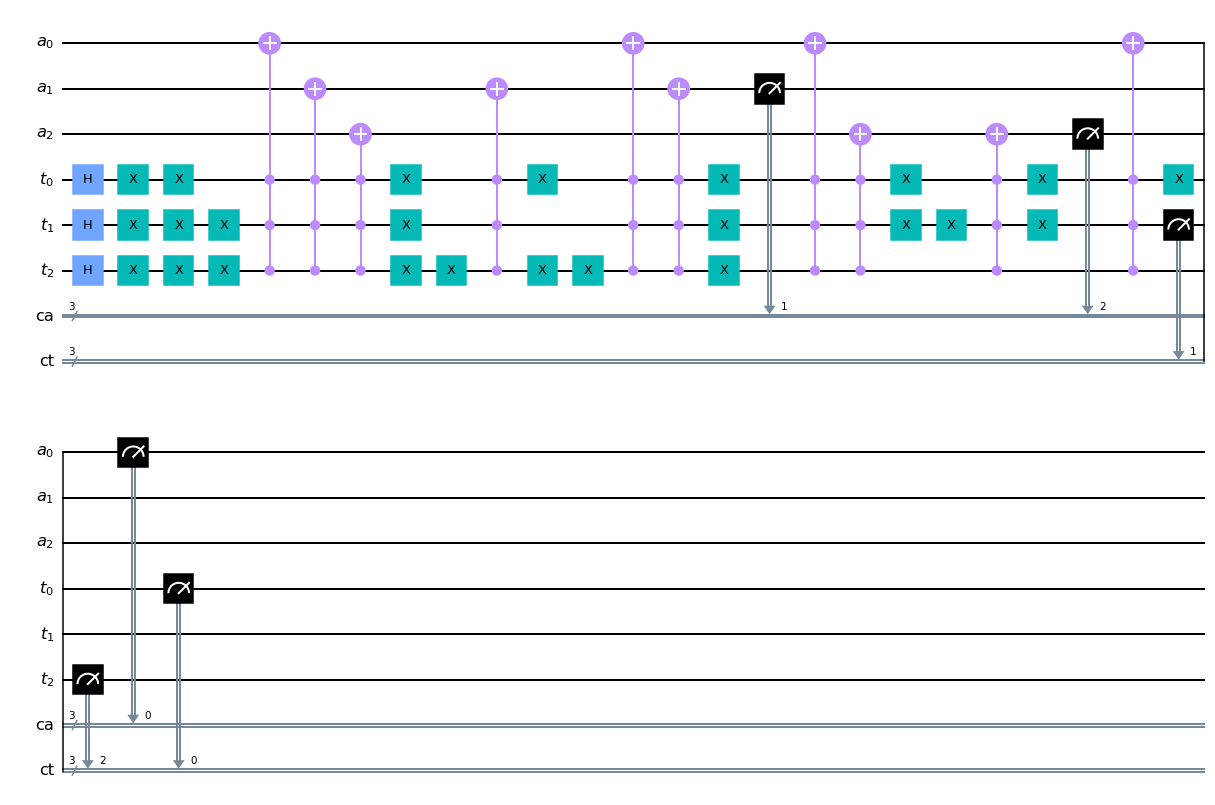

In [11]:
qsound_qsm.prepare().measure().circuit.draw('mpl')

Now that we have a quantum circuit, we can run it on *qasm_simutator*, or use it elsewhere

QPAM:

QuantumAudio run
Result(backend_name='qasm_simulator', backend_version='0.8.2', qobj_id='0a3b215a-3664-4307-a9e4-41e0694d81b0', job_id='335bc642-1a84-4086-b013-2c12a35035b8', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x2': 233, '0x4': 7, '0x6': 148, '0x1': 63, '0x0': 119, '0x7': 89, '0x3': 341}), header=QobjExperimentHeader(clbit_labels=[['ct', 0], ['ct', 1], ['ct', 2]], creg_sizes=[['ct', 3]], global_phase=0.0, memory_slots=3, metadata=None, n_qubits=3, name='circuit-4', qreg_sizes=[['t', 3]], qubit_labels=[['t', 0], ['t', 1], ['t', 2]]), status=DONE, seed_simulator=2987324538, metadata={'parallel_shots': 1, 'method': 'statevector', 'parallel_state_update': 8, 'measure_sampling': True, 'fusion': {'applied': False, 'max_fused_qubits': 5, 'enabled': True, 'threshold': 14}}, time_taken=0.004117096000000001)], date=2021-10-28T17:43:04.244686, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', backend_

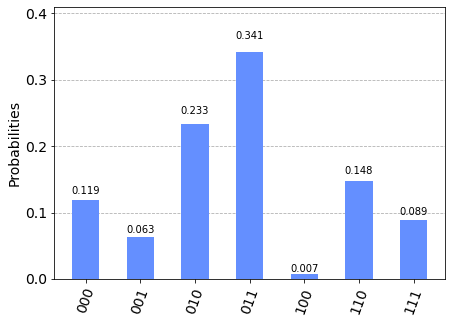

In [32]:
# Default values: QuantumAudio.run(shots=10, backend_name='qasm_simulator', provider=Aer)

# Simulating qsound_qpam.circuit in 'qasm_simulator' with 10 thousand shots:
shots = 1000
qsound_qpam.run(shots)
# print(qsound_qpam.result)
print(qsound_qpam.result)
qa.plot_histogram(qsound_qpam.counts)

SQ-PAM:

QuantumAudio run


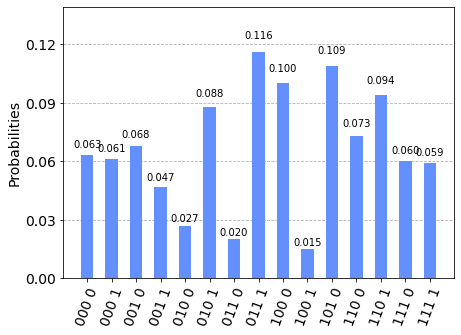

In [33]:
qsound_sqpam.run(shots)
qa.plot_histogram(qsound_sqpam.counts)

QSM:

QuantumAudio run


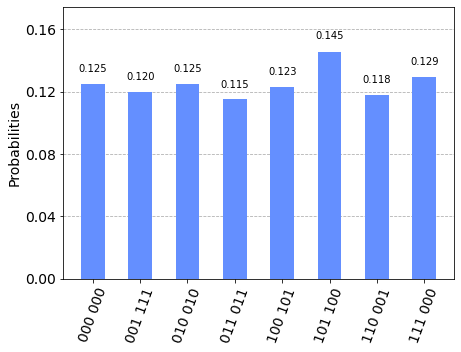

In [34]:
qsound_qsm.run(shots)
qa.plot_histogram(qsound_qsm.counts)

The last step of the process is to decode/reconstruct the histogram output into a digital audio output:

QPAM

QPAM Reconstruct


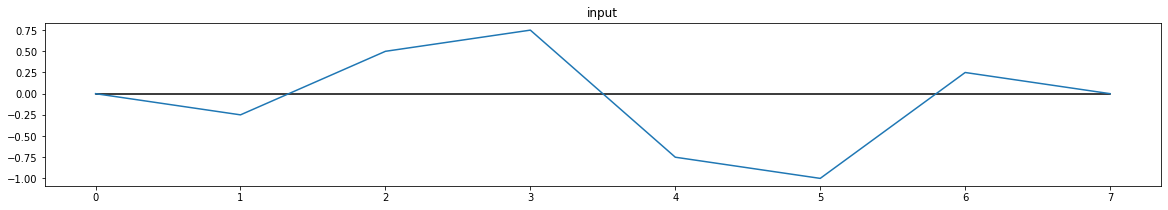

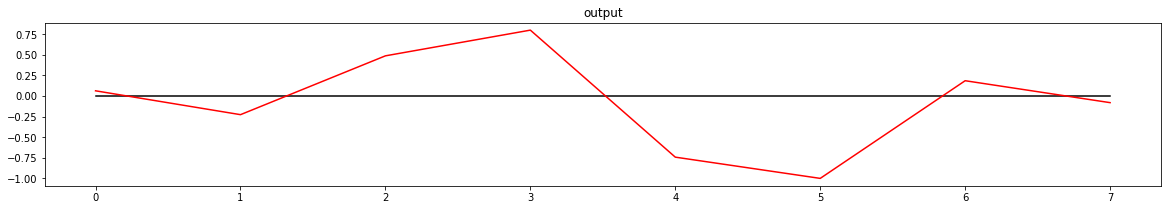

In [35]:
qsound_qpam.reconstruct_audio()
qsound_qpam.plot_audio()

SQ-PAM

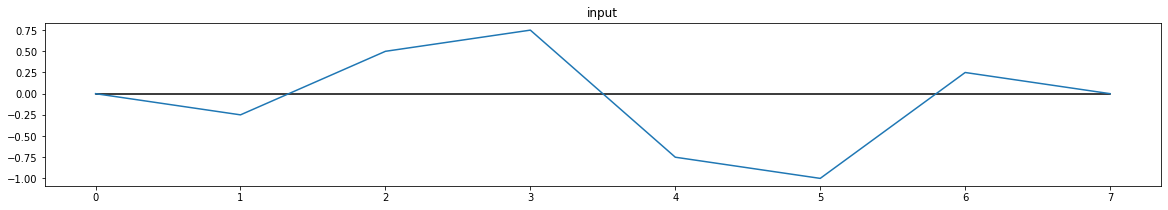

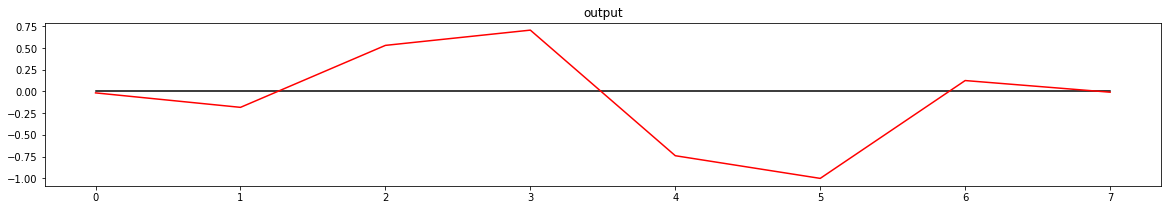

In [36]:
qsound_sqpam.reconstruct_audio()
qsound_sqpam.plot_audio()

QSM

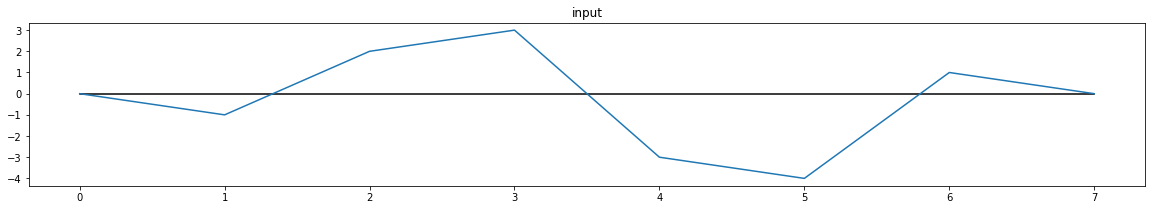

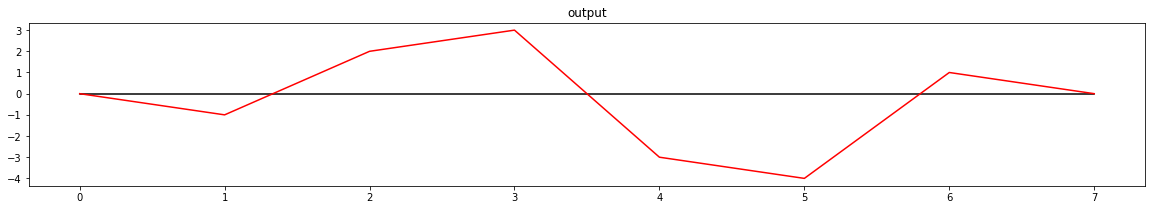

In [37]:
qsound_qsm.reconstruct_audio()
qsound_qsm.plot_audio()

Finally if the audio is large enough, it could be heard:

In [38]:
sample_rate = 3000
qsound_qpam.listen(sample_rate)

For one-liners, this whole process can be written, for any representation, as:

For this input, the QPAM representation will require:
         3 qubits for encoding time information and 
         0 qubits for encoding ampĺitude information.
QPAM Convert
QPAM Prepare
QPAM Measure
QuantumAudio run
QPAM Reconstruct


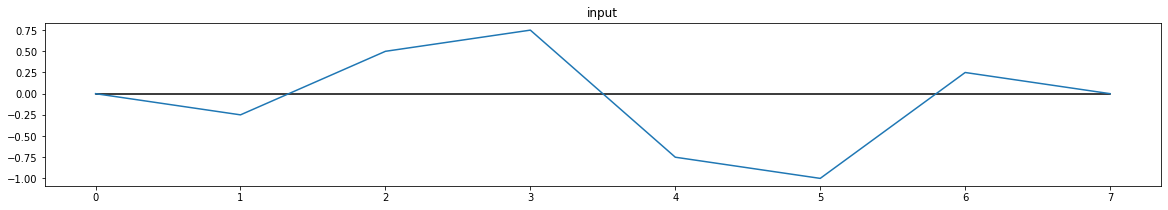

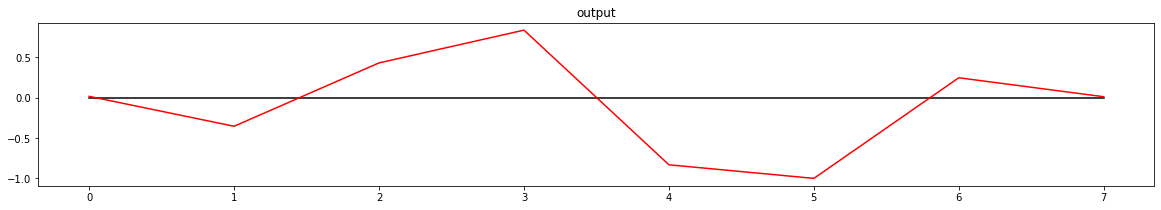

In [52]:
qsound = qa.QuantumAudio('qpam')
qsound.load_input(quantized_ditial_audio, 3).prepare().measure().run(1000).reconstruct_audio().plot_audio()